In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

customer_churn_df = pd.read_csv('churn.csv')

In [3]:
customer_churn_df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='str')

[]

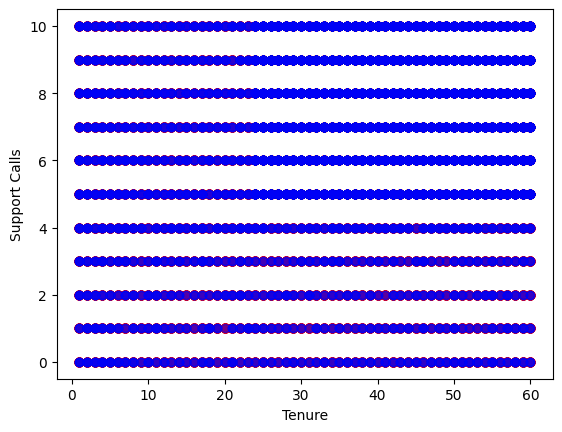

In [4]:
churn_true = customer_churn_df[customer_churn_df['Churn'] == 1]
churn_false = customer_churn_df[customer_churn_df['Churn'] == 0]


# For False
plt.scatter(
    churn_false['Tenure'],
    churn_false['Support Calls'],
    color='red',
    label='Churn = false',
    alpha=0.8
)

# For True
plt.scatter(
    churn_true['Tenure'],
    churn_true['Support Calls'],
    color='blue',
    label='Churn = True',
    alpha=0.1
)

plt.xlabel("Tenure")
plt.ylabel("Support Calls")

plt.plot()

In [ ]:
feature = customer_churn_df[['Tenure','Support Calls']].values
target = customer_churn_df[['Churn']].values

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(feature,target)

feature_new = np.array([
    [2, 6],    # New customer, many support calls → likely churn
    [18, 1],   # Long-term customer, few calls → likely no churn
    [6, 4],    # Medium tenure, moderate issues
])

predictions = knn.predict(feature_new)

print('Predictions: {}'.format(predictions))


Predictions: [0 0 0]


/Users/apple/Documents Local/Mubashir Code/ML/.venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:243: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [9]:
from sklearn.model_selection import train_test_split
feature_train , feature_test , target_train , target_test = train_test_split(feature,target,
                                                                            test_size=0.9,
                                                                            random_state=42,
                                                                            stratify=target)
knn.fit(feature_train,target_train)
print(knn.score(feature_test,target_test))

target_train = target_train.ravel()
target_test = target_test.ravel()

/Users/apple/Documents Local/Mubashir Code/ML/.venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:243: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7117040923762017


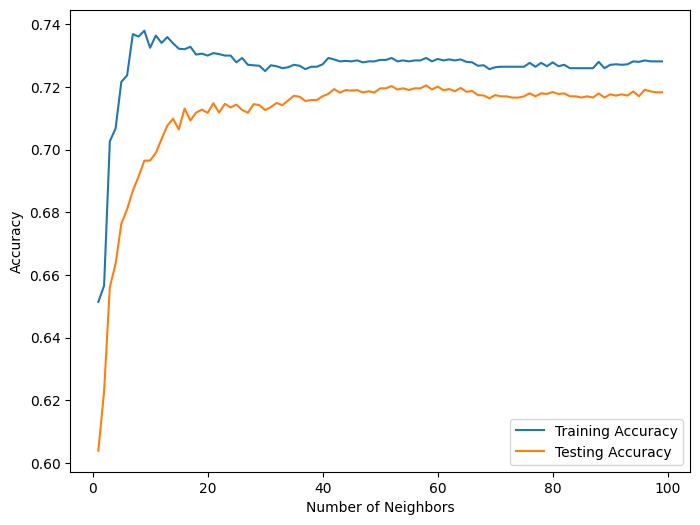

In [10]:
train_accuracies = {}
test_accuracies = {}

neighbors = np.arange(1,100)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(feature_train,target_train)
    train_accuracies[neighbor] = knn.score(feature_train,target_train)
    test_accuracies[neighbor] = knn.score(feature_test,target_test)

plt.figure(figsize=(8,6))
plt.plot(neighbors,train_accuracies.values(),label='Training Accuracy')
plt.plot(neighbors,test_accuracies.values(),label='Testing Accuracy')
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()